In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import copy
from tensorflow.keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.models import load_model
from sklearn.preprocessing import StandardScaler  
from collections import defaultdict
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.optimizers import SGD

csv_file = r'C:\Users\mikel\Desktop\2024\FYP\Good\ibb.csv'
ibb_full = pd.read_csv(csv_file,index_col=0).dropna(axis=1, how='any').astype('float32')
ibb_percentage = ibb_full.iloc[:,2] # Series
ibb_cali = ibb_percentage[1:104]/100
ibb_vali = ibb_percentage[104:]/100

csv_file = r'C:\Users\mikel\Desktop\2024\FYP\Good\percentage_change.csv'
data = pd.read_csv(csv_file,index_col=0).dropna(axis=1, how='any').astype('float32')
calibration = data.iloc[1:104,:]/100
validation = data.iloc[104:,:]/100

In [3]:
data

,CELG US Equity,GILD US Equity,BIIB US Equity,AMGN US Equity,REGN US Equity,INCY US Equity,ILMN US Equity,MYL US Equity,VRTX US Equity,ALXN US Equity,...,AVDL US Equity,ARNA US Equity,GERN US Equity,NVAX US Equity,PDLI US Equity,SGMO US Equity,ZGNX US Equity,CGEN US Equity,MNOV US Equity,ARWR US Equity
1/6/2012,-0.5621,4.5199,4.9523,0.8566,18.690201,8.5943,4.232300,0.0466,2.5294,4.1259,...,9.4050,-13.3690,12.8378,8.7302,-1.1290,6.690100,27.0270,2.8283,6.470600,26.2530
1/13/2012,8.0482,4.9322,0.4589,4.3854,19.957399,3.4969,12.401600,1.1178,8.1057,0.2283,...,1.0526,1.8519,1.1976,-4.3796,-0.3263,7.920800,-8.8652,7.2692,2.209900,-0.5671
1/20/2012,1.6660,5.6806,1.8185,2.9142,-0.747600,2.4303,1.652200,-0.6909,-1.3583,-1.3937,...,-4.1667,-1.8182,2.3669,0.0000,3.6007,-2.140700,-3.1128,-2.5641,0.000000,2.4715
1/27/2012,-0.6365,2.6981,0.3555,-1.7680,9.204600,3.7037,42.382900,-2.4119,-0.9088,2.4735,...,10.1449,-1.8519,13.2948,10.6870,1.1058,3.125000,7.6305,2.8195,-2.702700,-9.4434
2/3/2012,-0.2181,12.2640,2.8003,1.3755,13.233600,-1.4509,0.299900,6.6540,2.2235,4.6088,...,8.0592,17.6101,5.8673,2.7586,1.2500,37.878799,1.8657,7.6782,25.000000,3.4624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/1/2016,0.6465,3.0661,2.2969,3.2967,9.290700,5.0745,7.416000,3.5310,-1.7746,7.3204,...,2.1415,8.1967,4.8951,5.9846,6.4309,13.114800,4.1981,-2.7491,35.738800,7.2210
4/8/2016,5.0104,2.0931,3.9495,1.4920,-0.076500,5.6889,0.899000,-1.0526,7.7069,4.1626,...,8.0219,-4.0404,5.0000,0.3643,-1.2085,11.111100,10.8471,9.7173,4.430400,5.9184
4/15/2016,1.0164,2.2895,-0.8603,2.3456,0.442000,0.4002,3.136100,-0.2340,-4.1056,2.8209,...,-4.7257,-2.6316,3.4921,-0.7260,11.0092,0.144900,-0.7456,10.4670,8.848500,20.0385
4/22/2016,2.9625,3.7033,5.2886,1.9109,-0.577800,-1.2985,-17.305901,2.9857,6.1774,3.9258,...,2.7458,0.0000,0.3067,2.3766,5.2342,3.039100,9.2019,3.7901,-7.015600,0.4815


In [4]:
calibration

,CELG US Equity,GILD US Equity,BIIB US Equity,AMGN US Equity,REGN US Equity,INCY US Equity,ILMN US Equity,MYL US Equity,VRTX US Equity,ALXN US Equity,...,AVDL US Equity,ARNA US Equity,GERN US Equity,NVAX US Equity,PDLI US Equity,SGMO US Equity,ZGNX US Equity,CGEN US Equity,MNOV US Equity,ARWR US Equity
1/13/2012,0.080482,0.049322,0.004589,0.043854,0.199574,0.034969,0.124016,0.011178,0.081057,0.002283,...,0.010526,0.018519,0.011976,-0.043796,-0.003263,0.079208,-0.088652,0.072692,0.022099,-0.005671
1/20/2012,0.016660,0.056806,0.018185,0.029142,-0.007476,0.024303,0.016522,-0.006909,-0.013583,-0.013937,...,-0.041667,-0.018182,0.023669,0.000000,0.036007,-0.021407,-0.031128,-0.025641,0.000000,0.024715
1/27/2012,-0.006365,0.026981,0.003555,-0.017680,0.092046,0.037037,0.423829,-0.024119,-0.009088,0.024735,...,0.101449,-0.018519,0.132948,0.106870,0.011058,0.031250,0.076305,0.028195,-0.027027,-0.094434
2/3/2012,-0.002181,0.122640,0.028003,0.013755,0.132336,-0.014509,0.002999,0.066540,0.022235,0.046088,...,0.080592,0.176101,0.058673,0.027586,0.012500,0.378788,0.018657,0.076782,0.250000,0.034624
2/10/2012,-0.020079,-0.017278,-0.030686,-0.027714,0.053892,-0.039638,0.039545,0.016043,-0.017673,0.057940,...,0.009132,0.037433,-0.038554,-0.093960,-0.013889,-0.068132,-0.007326,0.039049,-0.082667,0.029703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/29/2013,-0.009551,0.007271,0.018745,0.009290,0.000613,-0.039571,-0.018331,0.034216,0.047375,0.013926,...,0.009611,0.114530,0.018975,0.072046,0.042133,0.081488,0.121528,0.027695,0.031532,0.106183
12/6/2013,0.028806,-0.010961,-0.000241,0.000351,-0.037841,-0.000215,0.012755,0.000227,-0.042783,0.007631,...,0.029990,-0.087423,0.091248,0.137097,-0.151484,0.021294,0.006192,-0.077960,-0.013100,-0.008505
12/13/2013,-0.009193,-0.035005,-0.053558,-0.017175,-0.046509,0.049367,0.032040,-0.053466,-0.019112,-0.014029,...,-0.011905,-0.065546,-0.186007,-0.085106,-0.027744,-0.022454,-0.070769,-0.091858,0.039823,-0.007353
12/20/2013,0.015646,0.045658,0.029130,0.016673,0.033755,0.050112,0.024309,0.017472,0.102025,0.056189,...,0.010710,0.001799,0.013627,0.273902,0.031017,0.127153,0.021523,-0.055172,-0.085106,0.225926


In [4]:
validation

,CELG US Equity,GILD US Equity,BIIB US Equity,AMGN US Equity,REGN US Equity,INCY US Equity,ILMN US Equity,MYL US Equity,VRTX US Equity,ALXN US Equity,...,AVDL US Equity,ARNA US Equity,GERN US Equity,NVAX US Equity,PDLI US Equity,SGMO US Equity,ZGNX US Equity,CGEN US Equity,MNOV US Equity,ARWR US Equity
1/3/2014,0.005209,-0.001746,0.000830,-0.005646,-0.019095,0.045866,-0.016036,-0.001403,0.000000,0.001140,...,0.101990,-0.019967,0.008264,0.035088,0.026222,-0.034188,-0.011730,0.087008,-0.004630,-0.068681
1/10/2014,0.000000,0.007400,0.078983,0.030750,0.009678,0.153491,0.074210,0.076077,0.064806,0.026496,...,0.208804,0.081494,0.069672,-0.024482,0.031359,0.406342,0.278932,0.120614,-0.013953,0.189774
1/17/2014,-0.016312,0.047148,-0.006114,0.009831,0.064218,0.031683,0.168595,-0.004786,0.049610,0.033282,...,-0.003735,0.139717,-0.136973,0.183398,0.010135,0.030414,0.002320,0.093933,0.132075,0.017355
1/24/2014,-0.034842,0.028316,0.020573,0.001175,-0.042432,0.033457,0.016723,-0.031475,-0.028262,-0.043447,...,-0.073102,0.008264,0.247503,0.019576,0.006689,-0.037150,0.004630,-0.074240,0.041667,-0.047929
1/31/2014,-0.057623,0.000372,0.029776,-0.002850,0.032116,0.024711,0.096523,0.024825,-0.009151,0.187743,...,0.106168,-0.135246,-0.106762,-0.129600,0.007752,0.022199,0.020737,0.045411,-0.076000,0.308874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4/1/2016,0.006465,0.030661,0.022969,0.032967,0.092907,0.050745,0.074160,0.035310,-0.017746,0.073204,...,0.021415,0.081967,0.048951,0.059846,0.064309,0.131148,0.041981,-0.027491,0.357388,0.072210
4/8/2016,0.050104,0.020931,0.039495,0.014920,-0.000765,0.056889,0.008990,-0.010526,0.077069,0.041626,...,0.080219,-0.040404,0.050000,0.003643,-0.012085,0.111111,0.108471,0.097173,0.044304,0.059184
4/15/2016,0.010164,0.022895,-0.008603,0.023456,0.004420,0.004002,0.031361,-0.002340,-0.041056,0.028209,...,-0.047257,-0.026316,0.034921,-0.007260,0.110092,0.001449,-0.007456,0.104670,0.088485,0.200385
4/22/2016,0.029625,0.037033,0.052886,0.019109,-0.005778,-0.012985,-0.173059,0.029857,0.061774,0.039258,...,0.027458,0.000000,0.003067,0.023766,0.052342,0.030391,0.092019,0.037901,-0.070156,0.004815


In [5]:
ibb_cali

Date
13/1/2012     0.047943
20/1/2012     0.005785
27/1/2012     0.028850
3/2/2012      0.037674
10/2/2012    -0.014589
                ...   
29/11/2013    0.016000
6/12/2013    -0.009591
13/12/2013   -0.029368
20/12/2013    0.038099
27/12/2013    0.009924
Name: % Change, Length: 103, dtype: float32

In [8]:
data = data/100
volatility = data.std()

# Rank the stocks by volatility
sorted_volatility = volatility.sort_values(ascending=False)

# Select the top 20 most volatile stocks
top_20_volatile_stocks = sorted_volatility.head(20)

# Calculate the total volatility of the top 20 most volatile stocks
total_volatility = top_20_volatile_stocks.sum()

# Print the total volatility
print("Total volatility of the top 20 most volatile stocks:", total_volatility)

Total volatility of the top 20 most volatile stocks: 4.4572153


Epoch 1/400


D:\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0201  
Epoch 2/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0195 
Epoch 3/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0192 
Epoch 4/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0191 
Epoch 5/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 
Epoch 6/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0189 
Epoch 7/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 
Epoch 8/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0188 
Epoch 9/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187 
Epoch 10/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0187 
Epoch 11/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - loss: 0.0186
Epoch 12/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0186 
Epoch 13/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0185 
Epoch 14/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.0185
Epoch 15/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 161/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 162/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 163/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - loss: 0.0063
Epoch 164/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - loss: 0.0063
Epoch 165/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 166/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 167/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 168/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0063 
Epoch 169/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.0062
Epoch 170/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0062 
Epoch 171/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.0062
Epoch 172/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - loss: 0.0062
Epoch 173/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.0062
Epoch 174/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 319/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 320/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 960us/step - loss: 0.0055
Epoch 321/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 322/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 323/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 324/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - loss: 0.0055
Epoch 325/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 326/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 327/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 328/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 329/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 330/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0055 
Epoch 331/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 977us/step - loss: 0.0055
Epoch 332/400
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9

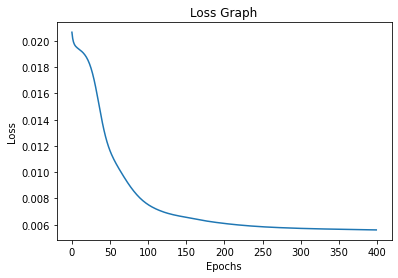

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [2]:
encoding_dim = 5 # 5 neurons
num_stock = len(calibration.columns) # Use 83 stocks as features
dl_scaler = defaultdict(StandardScaler)

autoencoder = Sequential()
autoencoder.add(Dense(encoding_dim, activation='relu', input_shape=(num_stock,),kernel_regularizer=l2(0.000001)))
autoencoder.add(Dense(num_stock, activation='linear',kernel_regularizer=l2(0.00001)))
#autoencoder.compile(optimizer=Adam(learning_rate=0.0025), loss='mean_squared_error')
#autoencoder.compile(optimizer=RMSprop(learning_rate=0.005), loss='mean_squared_error')
autoencoder.compile(optimizer=SGD(learning_rate= 0.5),loss='mean_squared_error')

# train autoencoder
history = autoencoder.fit(calibration,calibration, shuffle=False, epochs = 400, batch_size = 4)
autoencoder.save('model/retrack_autoencoder_ibb.h5')
losses = history.history['loss']
plt.plot(losses)
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
# test/reconstruct market information matrix
reconstruct = autoencoder.predict(calibration)

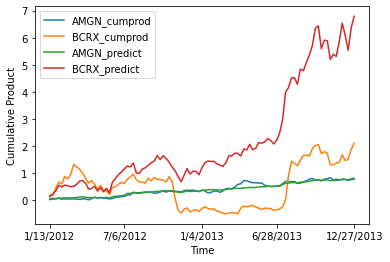

In [3]:
# Create a figure and axis
fig, ax = plt.subplots()
 
AMGN_cumprod = (1 + calibration.iloc[:]['AMGN    US Equity']).cumprod().to_frame(name='values')
BCRX_cumprod = (1 + calibration.iloc[:]['BCRX    US Equity']).cumprod().to_frame(name='values')
AMGN_index = calibration.columns.get_loc('AMGN    US Equity')
BCRX_index = calibration.columns.get_loc('BCRX    US Equity')

ax.plot(AMGN_cumprod.index, AMGN_cumprod['values']-1, label='AMGN_cumprod')
ax.plot(BCRX_cumprod.index, BCRX_cumprod['values']-1, label='BCRX_cumprod')

indices = np.linspace(0, len(AMGN_cumprod.index) - 1, 5, dtype=int)
dates_show = AMGN_cumprod.index[indices]

# Plot the IBB_predict[s] lines for each 's'
AMGN_predict_cumprod = (1 + reconstruct[:,AMGN_index]).cumprod()
BCRX_predict_cumprod = (1 + reconstruct[:,BCRX_index]).cumprod()

# Convert ndarray to pandas Series with the same index as ibb_cumprod
AMGN_predict_series = pd.Series(AMGN_predict_cumprod, index=AMGN_cumprod.index)
BCRX_predict_series = pd.Series(BCRX_predict_cumprod, index=BCRX_cumprod.index)

ax.plot(AMGN_predict_series.index, AMGN_predict_series - 1, label=f'AMGN_predict')
ax.plot(BCRX_predict_series.index, BCRX_predict_series - 1, label=f'BCRX_predict')


# Set x-axis ticks and labels
ax.set_xticks(dates_show)

# Add labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Cumulative Product')
ax.legend()

# Display the plot
plt.show()

In [4]:
communal_information = []

for i in range(0,num_stock):
    diff = np.linalg.norm((calibration.iloc[:,i] - reconstruct[:,i])) # 2 norm difference
    communal_information.append(float(diff))
 
ranking = np.array(communal_information).argsort()

sorted_indices = np.argsort(ranking)
stock_codes = calibration.columns[:]
sorted_stock_codes = stock_codes[sorted_indices]
rankings_and_codes = []
# Print the ranking and corresponding stock code
for rank, stock_code in enumerate(sorted_stock_codes, start=1):
    rankings_and_codes.append((rank, stock_code))
rankings_dict = {code: rank for rank, code in rankings_and_codes}

In [5]:
rankings_dict

{'INCY    US Equity': 1,
 'RGEN    US Equity': 2,
 'MYL     US Equity': 3,
 'BIIB    US Equity': 4,
 'IRWD    US Equity': 5,
 'MNTA    US Equity': 6,
 'SRPT    US Equity': 7,
 'GILD    US Equity': 8,
 'ACHN    US Equity': 9,
 'ALXN    US Equity': 10,
 'TECH    US Equity': 11,
 'ILMN    US Equity': 12,
 'ACAD    US Equity': 13,
 'JAZZ    US Equity': 14,
 'SGEN    US Equity': 15,
 'AMGN    US Equity': 16,
 'QGEN    US Equity': 17,
 'ALNY    US Equity': 18,
 'HALO    US Equity': 19,
 'NKTR    US Equity': 20,
 'PGNX    US Equity': 21,
 'CGEN    US Equity': 22,
 'CELG    US Equity': 23,
 'GHDX    US Equity': 24,
 'BMRN    US Equity': 25,
 'ARRY    US Equity': 26,
 'SHPG    US Equity': 27,
 'SGMO    US Equity': 28,
 'PCRX    US Equity': 29,
 'GERN    US Equity': 30,
 'NBIX    US Equity': 31,
 'TLGT    US Equity': 32,
 'CBPO    US Equity': 33,
 'LGND    US Equity': 34,
 'SCMP    US Equity': 35,
 'AKRX    US Equity': 36,
 'HZNP    US Equity': 37,
 'IPXL    US Equity': 38,
 'MYGN    US Equity':

Epoch 1/400


D:\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5719  
Epoch 2/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4023 
Epoch 3/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3542 
Epoch 4/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2487 
Epoch 5/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1795 
Epoch 6/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1272 
Epoch 7/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1356 
Epoch 8/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1180 
Epoch 9/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0721 
Epoch 10/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0804 
Epoch 11/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0497 
Epoch 12/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0425 
Epoch 13/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0484 
Epoch 14/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0354 
Epoch 15/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0288 
Epoch 16/400
4/4 ━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011     
Epoch 84/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 
Epoch 85/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 
Epoch 86/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0010 
Epoch 87/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5848e-04 
Epoch 88/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0011 
Epoch 89/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4498e-04 
Epoch 90/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9597e-04 
Epoch 91/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.7742e-04 
Epoch 92/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.4561e-04 
Epoch 93/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.9698e-04
Epoch 94/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.5726e-04 
Epoch 95/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.9898e-04 
Epoch 96/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5387e-04 
Epoch 97/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8195e-04 
Epoch 240/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2935e-04 
Epoch 241/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9758e-04 
Epoch 242/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9949e-04 
Epoch 243/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2002e-04 
Epoch 244/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.8321e-04 
Epoch 245/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2957e-04 
Epoch 246/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.0403e-04 
Epoch 247/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8584e-04 
Epoch 248/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9802e-04 
Epoch 249/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8194e-04 
Epoch 250/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9312e-04 
Epoch 251/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9671e-04 
Epoch 252/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0515e-04 
Epoch 253/400
4/4 ━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8114e-04 
Epoch 396/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4696e-04 
Epoch 397/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5006e-04 
Epoch 398/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1369e-04 
Epoch 399/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5949e-04 
Epoch 400/400
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7364e-04 


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


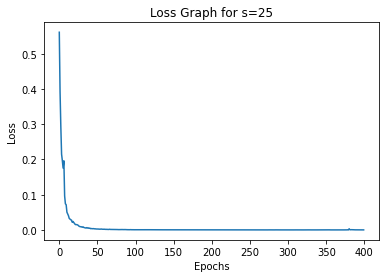

Epoch 1/350


D:\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5124  
Epoch 2/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3858 
Epoch 3/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3138 
Epoch 4/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2195 
Epoch 5/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1656 
Epoch 6/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1492 
Epoch 7/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1031 
Epoch 8/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0757 
Epoch 9/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0677 
Epoch 10/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0506 
Epoch 11/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0383 
Epoch 12/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0380 
Epoch 13/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0259 
Epoch 14/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0263 
Epoch 15/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 
Epoch 16/350
4/4 ━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1218e-04 
Epoch 161/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2210e-04 
Epoch 162/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0508e-04 
Epoch 163/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3275e-04 
Epoch 164/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1923e-04 
Epoch 165/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1810e-04 
Epoch 166/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.6947e-05 
Epoch 167/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2913e-04 
Epoch 168/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.5458e-05 
Epoch 169/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.3555e-05 
Epoch 170/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2721e-04 
Epoch 171/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8.6158e-05 
Epoch 172/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2243e-04 
Epoch 173/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0563e-04 
Epoch 174/350
4/4 ━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.0315e-05 
Epoch 317/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3223e-04 
Epoch 318/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0031e-04 
Epoch 319/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2333e-04 
Epoch 320/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0654e-04 
Epoch 321/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1371e-04 
Epoch 322/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0468e-04 
Epoch 323/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0981e-04 
Epoch 324/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.4184e-05 
Epoch 325/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1689e-04 
Epoch 326/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0619e-04 
Epoch 327/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2143e-04 
Epoch 328/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2107e-04 
Epoch 329/350
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2677e-04 
Epoch 330/350
4/4 ━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


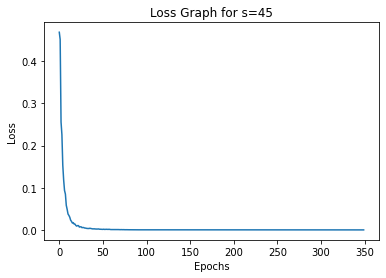

Epoch 1/250


D:\Anaconda\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.5229  
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3355 
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1979 
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1378 
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0971 
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0795 
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0651 
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0513 
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0339 
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0321 
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0286 
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0225 
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0165 
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163 
Epoch 15/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 
Epoch 16/250
4/4 ━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1980e-05 
Epoch 160/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3726e-05 
Epoch 161/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3542e-05 
Epoch 162/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9120e-05 
Epoch 163/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.1575e-05 
Epoch 164/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.3289e-05 
Epoch 165/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4248e-05 
Epoch 166/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.4403e-05 
Epoch 167/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.8060e-05 
Epoch 168/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.6151e-05 
Epoch 169/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.5189e-05 
Epoch 170/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.1223e-05 
Epoch 171/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3989e-05 
Epoch 172/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.3208e-05 
Epoch 173/250
4/4 ━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


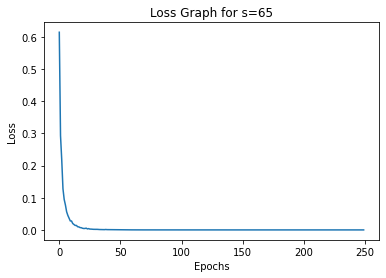

In [11]:
ibb_predict = {}
total_2_norm_diff = {}
dl_scaler = defaultdict(StandardScaler)
losses = {}
ep = {25: 400, 45: 350, 65: 250}

for non_communal in [15, 35, 55]:  
    encoding_dim = 5
    s = 10 + non_communal

    deep_learner = Sequential()
    deep_learner.add(Dense(encoding_dim, activation='relu', input_shape=(s,),kernel_regularizer=l2(0.000001)))
    deep_learner.add(Dense(1, activation='linear',kernel_regularizer=l2(0.000001)))
    deep_learner.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')
    #deep_learner.compile(optimizer=SGD(learning_rate=0.005), loss='mean_squared_error')
    bottom_codes = sorted(rankings_dict, key=rankings_dict.get)[-non_communal:]
    top_codes = sorted(rankings_dict, key=rankings_dict.get)[:10]
    stockcodes = np.concatenate((top_codes, bottom_codes))

    x = calibration.loc[:,stockcodes]
    y = ibb_cali

    dl_scaler[s] = StandardScaler()
    dl_scaler[s].fit(x)
    x = dl_scaler[s].transform(x)  

    history = deep_learner.fit(x, y, epochs=ep[s], batch_size = 32)
    #history = deep_learner.fit(x, y, epochs=ep[s], batch_size = 32)
    losses[s] = history.history['loss']
    deep_learner.save('model/retrack_s_ibb' + str(s) + '.h5')
    ibb_predict[s] = deep_learner.predict(x).ravel()

    total_2_norm_diff[s] = np.linalg.norm((ibb_predict[s] - ibb_cali.squeeze()).dropna())   

    plt.plot(losses[s])
    plt.title('Loss Graph for s=' + str(s))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

ibb_predict = {}
total_2_norm_diff = {}
dl_scaler = defaultdict(StandardScaler)
losses = {}
ep = {25: 300, 45: 250, 65: 200}

for non_communal in [15, 35, 55]:  
    # some numerical values
    encoding_dim = 5
    s = 10 + non_communal
    
    deep_learner = Sequential()
    deep_learner.add(Dense(encoding_dim, activation='relu', input_shape=(s,),kernel_regularizer=l2(0.000001)))
    deep_learner.add(Dense(1, activation='linear',kernel_regularizer=l2(0.000001)))
    deep_learner.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error')
    #deep_learner.compile(optimizer=SGD(learning_rate=0.05), loss='mean_squared_error')

    bottom_codes = sorted(rankings_dict, key=rankings_dict.get)[-non_communal:]
    top_codes = sorted(rankings_dict, key=rankings_dict.get)[:10]
    stockcodes = np.concatenate((top_codes, bottom_codes))
    
    x = calibration.loc[:,stockcodes]
    y = ibb_cali
    
    dl_scaler[s] = StandardScaler()       # Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
    dl_scaler[s].fit(x)
    x = dl_scaler[s].transform(x)  
    
# Train the model
    history = deep_learner.fit(x, y, epochs=ep[s], batch_size = 64)
    losses[s] = history.history['loss']
    deep_learner.save('model/retrack_s_ibb' + str(s) + '.h5') # fo[r validation phase use
    ibb_predict[s] = deep_learner.predict(x).flatten()
    
    total_2_norm_diff[s] = np.linalg.norm((ibb_predict[s] - ibb_cali.squeeze()).dropna())   
    
    plt.plot(losses[s])
    plt.title('Loss Graph for s=' + str(s))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()

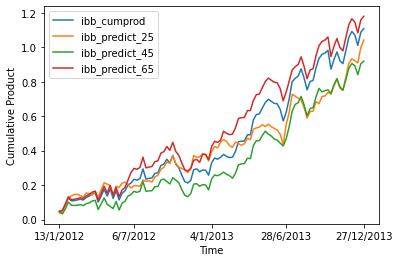

S25 2-norm difference:  0.16085838
S45 2-norm difference:  0.10184234
S65 2-norm difference:  0.060216393


In [12]:
# Create a figure and axis
fig, ax = plt.subplots()

ibb_cumprod = (1 + ibb_cali).cumprod().to_frame(name='values')

# Plot the IBB_cumprod line
ax.plot(ibb_cumprod.index, ibb_cumprod['values']-1, label='ibb_cumprod')

# Plot the IBB_predict[s] lines for each 's'
for s in [25, 45, 65]:
    ibb_predict_cumprod = (1 + ibb_predict[s]).cumprod()
    # Convert ndarray to pandas Series with the same index as ibb_cumprod
    ibb_predict_series = pd.Series(ibb_predict_cumprod, index=ibb_cumprod.index)
    ax.plot(ibb_predict_series.index, ibb_predict_series - 1, label=f'ibb_predict_{s}')

indices = np.linspace(0, len(ibb_cumprod.index) - 1, 5, dtype=int)
dates_show = ibb_cumprod.index[indices]
# Set x-axis ticks and labels
ax.set_xticks(dates_show)

# Add labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Cumulative Product')
ax.legend()

# Display the plot
plt.show()

for s in [25, 45, 65]:
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff[s])    

In [13]:
ibb_predict_Val = {}
total_2_norm_diff_Val = {}
for non_communal in [15, 35, 55]:  
    # some numerical values
    encoding_dim = 5
    s = 10 + non_communal
    
    # construct and compile deep learning routine
    deep_learner = load_model('model/retrack_s_ibb' + str(s) + '.h5')
    #deep_learner.compile(optimizer=Adam(), loss='mse', metrics=['mae', 'mse'])
    print('model/retrack_s_ibb' + str(s) + '.h5')
    bottom_codes = sorted(rankings_dict, key=rankings_dict.get)[:non_communal]
    top_codes = sorted(rankings_dict, key=rankings_dict.get)[:10]
    stockcodes = np.concatenate((top_codes, bottom_codes))
    
    x = validation.loc[:,stockcodes]
    y = ibb_vali
      
    dl_scaler[s] = StandardScaler()       # Multi-layer Perceptron is sensitive to feature scaling, so it is highly recommended to scale your data
    dl_scaler[s].fit(x)
    x = dl_scaler[s].transform(x)
    ibb_predict_Val[s] = deep_learner.predict(x).flatten()

    total_2_norm_diff_Val[s] = np.linalg.norm((ibb_predict_Val[s] - ibb_vali.squeeze()).dropna())    

model/retrack_s_ibb25.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


model/retrack_s_ibb45.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


model/retrack_s_ibb65.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


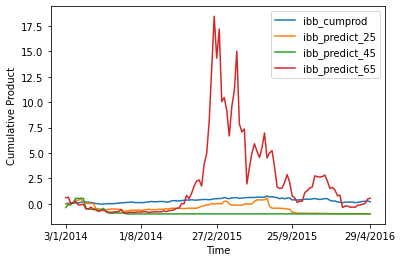

S25 2-norm difference:  0.16085838
S45 2-norm difference:  0.10184234
S65 2-norm difference:  0.060216393


In [14]:
# Create a figure and axis
fig, ax = plt.subplots()

ibb_cumprod_vali = (1 + ibb_vali).cumprod().to_frame(name='values')

# Plot the IBB_cumprod line
ax.plot(ibb_cumprod_vali.index, ibb_cumprod_vali['values']-1, label='ibb_cumprod')

indices = np.linspace(0, len(ibb_cumprod_vali.index) - 1, 5, dtype=int)
dates_show = ibb_cumprod_vali.index[indices]

# Plot the IBB_predict[s] lines for each 's'
for s in [25,45,65]:
    ibb_predict_cumprod_vali = (1 + ibb_predict_Val[s]).cumprod()
    # Convert ndarray to pandas Series with the same index as ibb_cumprod
    ibb_predict_series = pd.Series(ibb_predict_cumprod_vali, index=ibb_cumprod_vali.index)
    ax.plot(ibb_predict_series.index, ibb_predict_series - 1, label=f'ibb_predict_{s}')

# Set x-axis ticks and labels
ax.set_xticks(dates_show)

# Add labels and legend
ax.set_xlabel('Time')
ax.set_ylabel('Cumulative Product')
ax.legend()

# Display the plot
plt.show()

for s in [25,45,65]:
    print("S" +str(s) + " 2-norm difference: ", total_2_norm_diff[s])    

In [ ]:
ibb_predict_Ver = {}
error = []
for non_communal in range(10, 78, 5):
    encoding_dim = 5
    s = 10 + non_communal
    stock_index = np.concatenate((ranking[0:10], ranking[-non_communal:])) # portfolio index

    deep_learner = Sequential()
    deep_learner.add(Dense(encoding_dim, activation='relu', input_shape=(s,),kernel_regularizer=l2(0.000001)))
    deep_learner.add(Dense(1, activation='linear',kernel_regularizer=l2(0.000001)))
    #deep_learner.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
    deep_learner.compile(optimizer=SGD(learning_rate=0.005), loss='mean_squared_error')
    
    bottom_codes = sorted(rankings_dict, key=rankings_dict.get)[-non_communal:]
    top_codes = sorted(rankings_dict, key=rankings_dict.get)[:10]
    stockcodes = np.concatenate((top_codes, bottom_codes))
    
    x_train = calibration.loc[:,stockcodes]
    y_train = ibb_cali
    
    deep_learner.fit(x_train, y_train, shuffle=False, epochs=300, batch_size = 32)    # fit the model

    x_test = validation.loc[:,stockcodes]
    y_test = ibb_vali
    ibb_predict_Ver[s] = deep_learner.predict(x_test).flatten()

    arr_series = pd.Series(ibb_predict_Ver[s])
    index_mapping = dict(zip(arr_series.index, y_test.index))
    ibb_predict_Ver[s] = arr_series.rename(index=index_mapping)
    
    error.append(np.linalg.norm((ibb_predict_Ver[s] - ibb_vali.squeeze()).dropna()))    

In [ ]:
mse = [e/len(validation) for e in error] # mse = sum of 2 norm difference/ # of test dates
plt.gca().invert_yaxis() 
plt.plot(mse, list(range(10,78,5)))
plt.xlabel('Mean Squared Error')
plt.ylabel('number of stocks in the portfolio') 